In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
#removing values where gene-id is 0 (unidentified)
data = pd.read_csv('ExpressionR50.csv', header =None)
rows = pd.read_csv('RowsR50.csv')
age = np.array([12, 13, 13, 12, 16, 17, 21, 21, 24, 35, 37])
gene_id = rows.ix[:,2]
data_id = pd.concat([data, gene_id], axis=1)
new_data = data_id[data_id['gene-id']!= 0]
clean_data = new_data.ix[:,:-1]

In [3]:
just_data = new_data.ix[:,:11].values

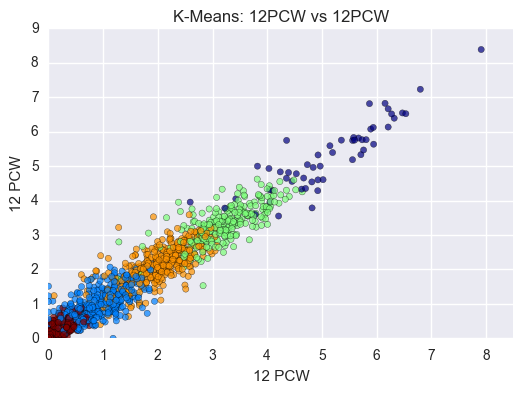

In [99]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,0],just_data[:,3],
            alpha=0.7, c=group, cmap='jet')

plt.xlim([0,8.5])
plt.ylim([0,9])
plt.title('K-Means: 12PCW vs 12PCW')
plt.xlabel("12 PCW")
plt.ylabel("12 PCW")

In [5]:
pd.DataFrame(just_data[:,:]).head()
Predict = pd.DataFrame(group)

In [6]:
Data_Predict = np.column_stack((new_data.iloc[:,11:13], Predict))
GeneID_Predict = pd.DataFrame(Data_Predict[:,:])
GeneID_Predict.head()

,0,1
0,30786,4
1,865,2
2,34129,4
3,81016,4
4,34829,4


In [7]:
cluster0 = GeneID_Predict[GeneID_Predict[1]== 0]
cluster1 = GeneID_Predict[GeneID_Predict[1]== 1]
cluster2 = GeneID_Predict[GeneID_Predict[1]== 2]
cluster3 = GeneID_Predict[GeneID_Predict[1]== 3]
cluster4 = GeneID_Predict[GeneID_Predict[1]== 4]

In [8]:
Cluster0_genes = cluster0.iloc[:,0:1].values
Cluster1_genes = cluster1.iloc[:,0:1].values
Cluster2_genes = cluster2.iloc[:,0:1].values
Cluster3_genes = cluster3.iloc[:,0:1].values
Cluster4_genes = cluster4.iloc[:,0:1].values

In [9]:
Cluster0_genes.size

388

In [10]:
Cluster1_genes.size

266

In [11]:
Cluster2_genes.size

53

In [12]:
Cluster3_genes.size

516

In [13]:
Cluster4_genes.size

374

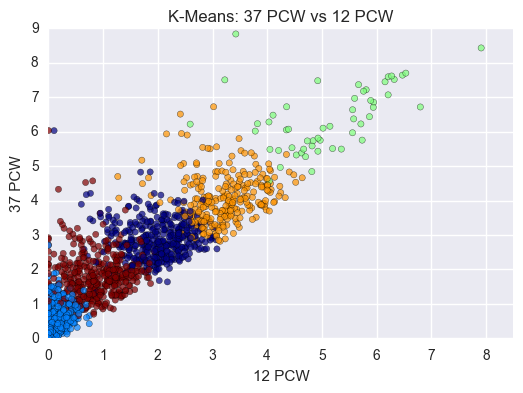

In [14]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,0],just_data[:,-1],
            alpha=0.7, c=group, cmap='jet')
plt.xlim([0,8.5])
plt.ylim([0,9])
plt.xlabel("12 PCW")
plt.ylabel("37 PCW")
plt.title("K-Means: 37 PCW vs 12 PCW")

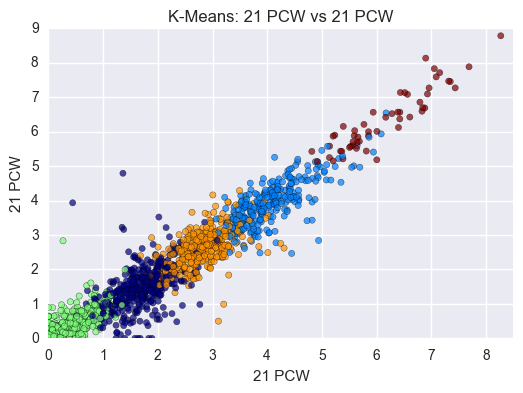

In [15]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,7],just_data[:,8],
            alpha=0.7, c=group, cmap='jet')

plt.xlim([0,8.5])
plt.ylim([0,9])
plt.xlabel("21 PCW")
plt.ylabel("21 PCW")
plt.title("K-Means: 21 PCW vs 21 PCW")

In [22]:
just_data.shape

(1597, 11)

In [35]:
just_dataT = just_data.T

In [37]:
just_dataT.shape

(11, 1597)

(1.7, 4.1)

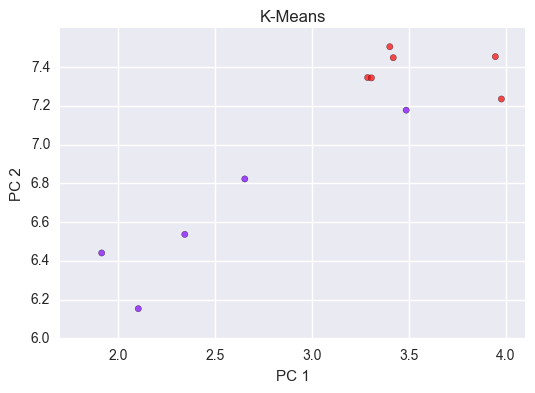

In [96]:
km = KMeans(n_clusters = 2)
km.fit(just_dataT)

group = km.labels_

plt.scatter(just_dataT[:,0],just_dataT[:,1],
            alpha=0.7, c=group, cmap='rainbow')

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("K-Means")
plt.xlim(1.7,4.1)

In [88]:
just_dataT

array([[ 2.1039,  6.1532,  2.3737, ...,  2.7875,  1.1149,  2.0222],
       [ 3.4865,  7.1778,  2.8386, ...,  2.6828,  1.0948,  1.8114],
       [ 2.3438,  6.5365,  2.1724, ...,  2.8202,  0.9829,  1.8631],
       ..., 
       [ 3.9467,  7.4539,  2.8335, ...,  3.0166,  1.0864,  1.826 ],
       [ 3.3072,  7.3443,  2.8269, ...,  3.5469,  1.6072,  2.4845],
       [ 3.4198,  7.4484,  2.8689, ...,  2.6085,  1.657 ,  2.0126]])